<a href="https://colab.research.google.com/github/ashaik1205/Surprise_Housing_Assignment/blob/main/Ugrad_surprise_housing_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import r2_score
from pandas import DataFrame
from sklearn import metrics
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [ ]:
# reading the dataset
df= pd.read_csv(r"Downloads\train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# missing values percentage
percent_miss = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
percent_miss.head(40)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

In [ ]:
# dropping the columns or features which have more than 40% of missing values
df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
# Dropping duplicate records in dataset, if exist
df= df.drop_duplicates()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
# treating remaining missing values
percent_miss = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
percent_miss.head(40)

LotFrontage      17.739726
GarageType        5.547945
GarageCond        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
PavedDrive        0.000000
WoodDeckSF        0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
SaleCondition     0.000000
BedroomAbvGr      0.000000
SaleType          0.000000
YrSold            0.000000
MoSold            0.000000
MiscVal           0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
PoolArea          0.000000
ScreenPorch       0.000000
Functional        0.000000
Fireplaces        0.000000
2ndFlrSF          0.000000
3SsnPorch         0.000000
E

In [ ]:
# imputing missing the values with the median
df['LotFrontage']= df.LotFrontage.fillna(df.LotFrontage.median()) #Can see a presence of outlier so imputing the missing values through median
df['MasVnrArea']= df.MasVnrArea.fillna(df.MasVnrArea.median())    # Can see presence of outlier
df['GarageYrBlt']= df.GarageYrBlt.fillna(df.GarageYrBlt.mean())  # it looks stable with no outlier presence so we can use mean for imputation

In [ ]:
# imputing the missing values of categorical variables with the mode
df['GarageType'] = df.GarageType.fillna(df.GarageType.mode()[0])
df['GarageFinish'] = df.GarageFinish.fillna(df.GarageFinish.mode()[0])
df['GarageCond'] = df.GarageCond.fillna(df.GarageCond.mode()[0])
df['GarageQual'] = df.GarageQual.fillna(df.GarageQual.mode()[0])
df['MasVnrType'] = df.MasVnrType.fillna(df.MasVnrType.mode()[0])
df['Electrical'] = df.Electrical.fillna(df.Electrical.mode()[0])

In [ ]:
# imputing the missing values of categorical variables with the mode
df['BsmtExposure'] = df.BsmtExposure.fillna(df.BsmtExposure.mode()[0])
df['BsmtFinType2'] = df.BsmtFinType2.fillna(df.BsmtFinType2.mode()[0])
df['BsmtFinType1'] = df.BsmtFinType1.fillna(df.BsmtFinType1.mode()[0])
df['BsmtCond'] = df.BsmtCond.fillna(df.BsmtCond.mode()[0])
df['BsmtQual'] = df.BsmtQual.fillna(df.BsmtQual.mode()[0])

In [ ]:
# finally there are no missing values
percent_miss = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
percent_miss.head(40)

Id               0.0
FullBath         0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
BsmtHalfBath     0.0
MSSubClass       0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
CentralAir       0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageArea       0.0
HeatingQC        0.0
Heating          0.0
TotalBsmtSF      0.0
dtype: float64

In [ ]:
# ID is not necessary for the prediction
df.drop('Id', axis=1, inplace=True)

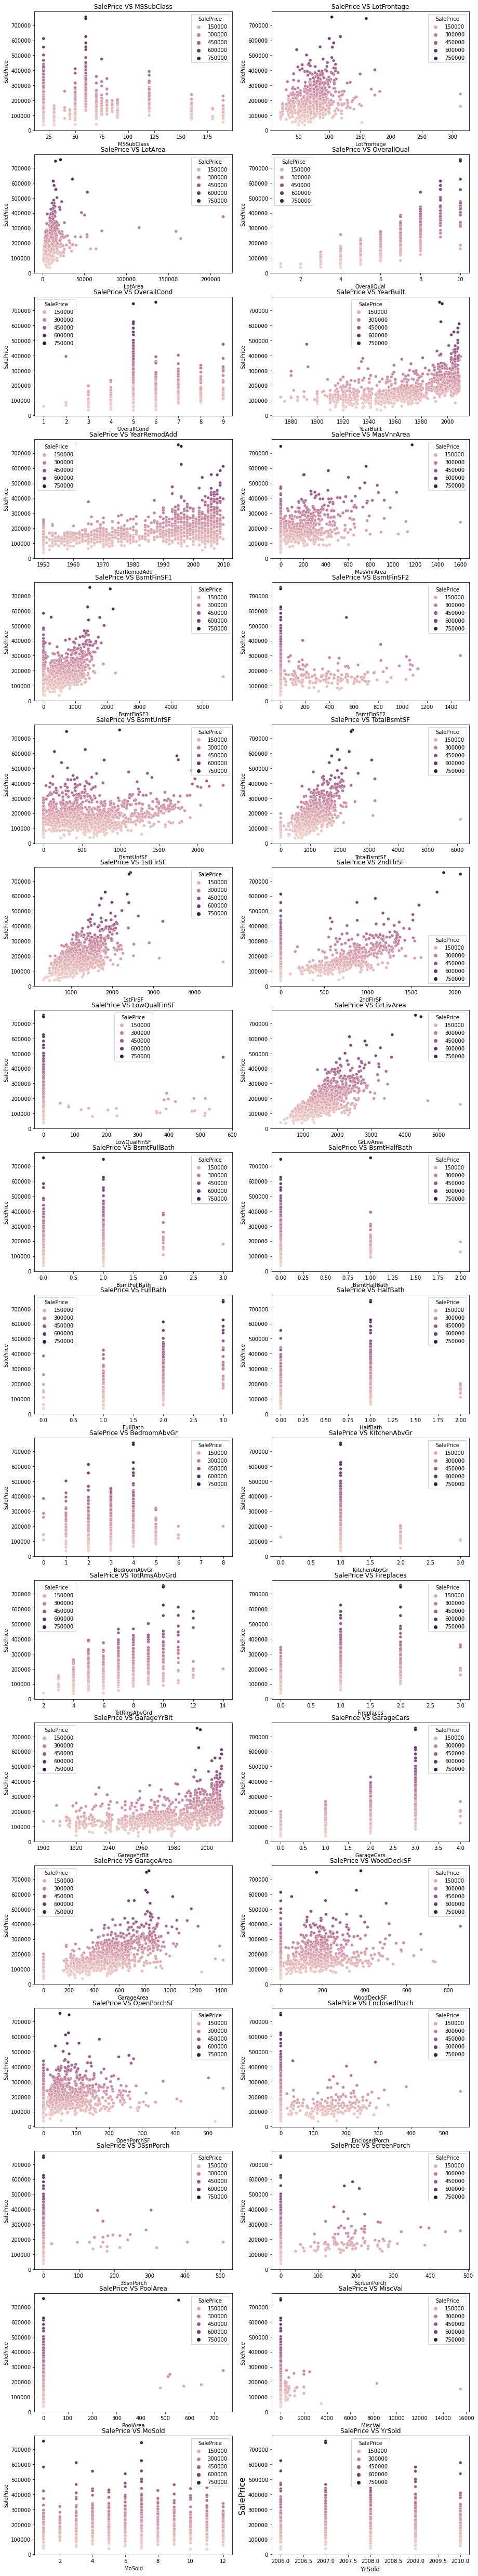

In [ ]:
# plotting numerical variables with output variable

df_num = df.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(18,2,figsize=(15,90))
for i,ax in zip(df_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_num,ax=ax,)
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=16)
    ax.set_title('SalePrice'+' VS '+str(i))

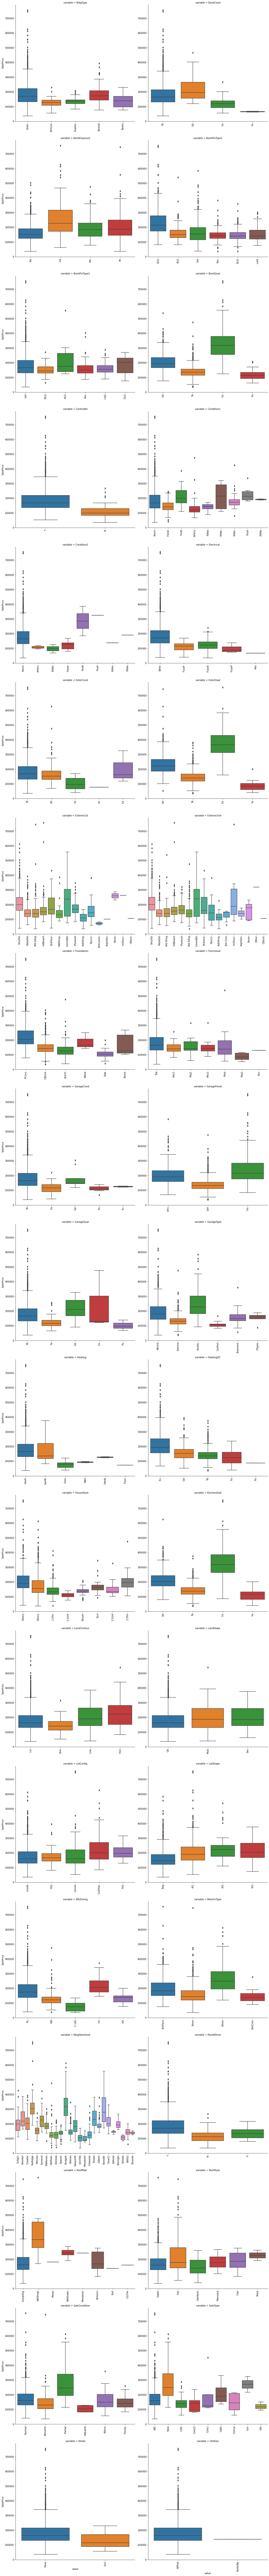

In [ ]:
# Plotting Categorical Features with output variable
def grid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
categorical = df.select_dtypes(exclude=['int64','float64'])
f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(df[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False, height=8)
g = g.map(grid_boxplot, "value", "SalePrice")

In [ ]:
# selecting the categorical columns from the dataframe
categorical = df.select_dtypes(exclude=['int64','float64'])

In [ ]:
cat_col=categorical.columns

In [ ]:
# Dumifying all columns 
for col in cat_col:
    # Let's drop the first column from dummy df using 'drop_first = True' otherwise it will get multicollinear
    dummies = pd.get_dummies(df[col], drop_first = True)
    # Adding prefix to dummy column names so as to identify it later
    dummies = dummies.add_prefix(f'{col}_')
    # Add the results to the original housing dataframe
    df = pd.concat([df, dummies], axis = 1)
    # Drop original categorical column as we have created the dummies for it
    df.drop([col], axis = 1, inplace = True)

df.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
# these features are not required for the prediction 
df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True) 


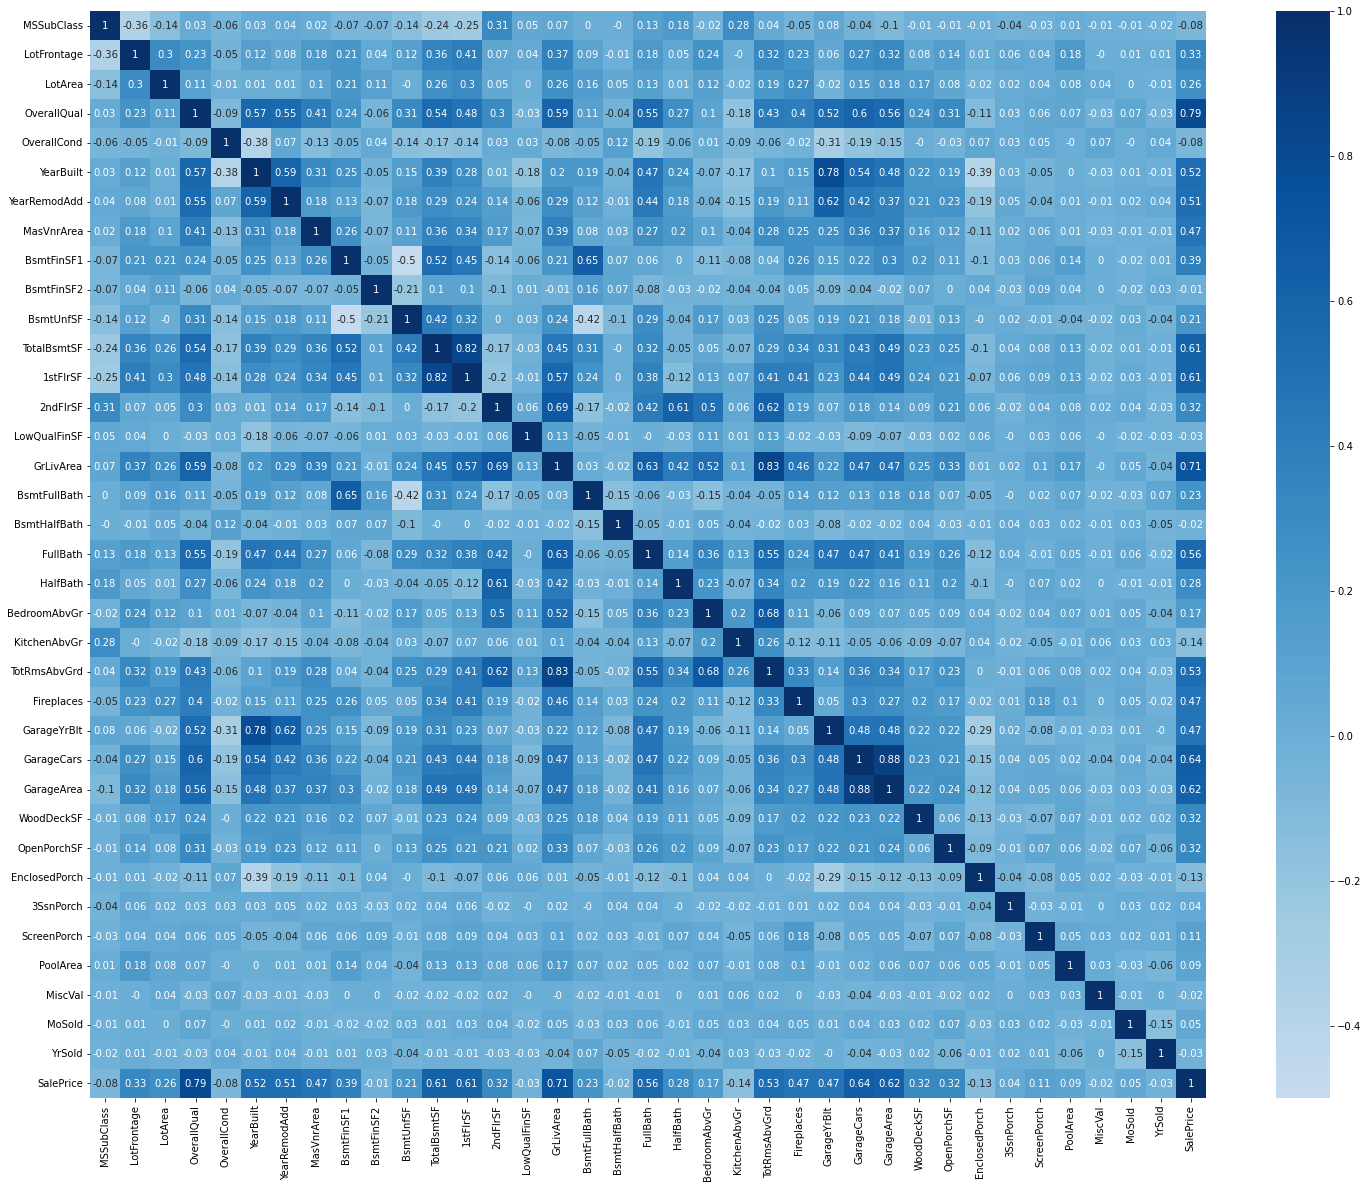

In [ ]:

# Checking the corelation
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(df_num.corr(),2), cmap='Blues' , annot=True, center = 0)
plt.show()

In [ ]:
# selecting the numerical columns from the data frame
num= df.select_dtypes(include=['int64','float64']) 
num_col=num.columns

In [ ]:
num_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'SalePrice'],
      dtype='object')

In [ ]:
# treating the outliers 
from scipy import stats
z = np.abs(stats.zscore(df[num_col]))
# Outlier Removed Records
selected = df[num_col][(z < 3).all(axis=1)]
df = df.loc[selected.index]
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0
6,20,75.0,10084,8,5,186.0,1369,0,317,1686,...,0,0,0,0,1,0,0,0,1,0
10,20,70.0,11200,5,5,0.0,906,0,134,1040,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,180,35.0,3675,5,5,80.0,547,0,0,547,...,0,0,0,0,1,0,0,0,1,0
1453,20,90.0,17217,5,5,0.0,0,0,1140,1140,...,0,0,0,0,1,0,0,0,0,0
1454,20,62.0,7500,7,5,0.0,410,0,811,1221,...,0,0,0,0,1,0,0,0,1,0
1455,60,62.0,7917,6,5,0.0,0,0,953,953,...,0,0,0,0,1,0,0,0,1,0


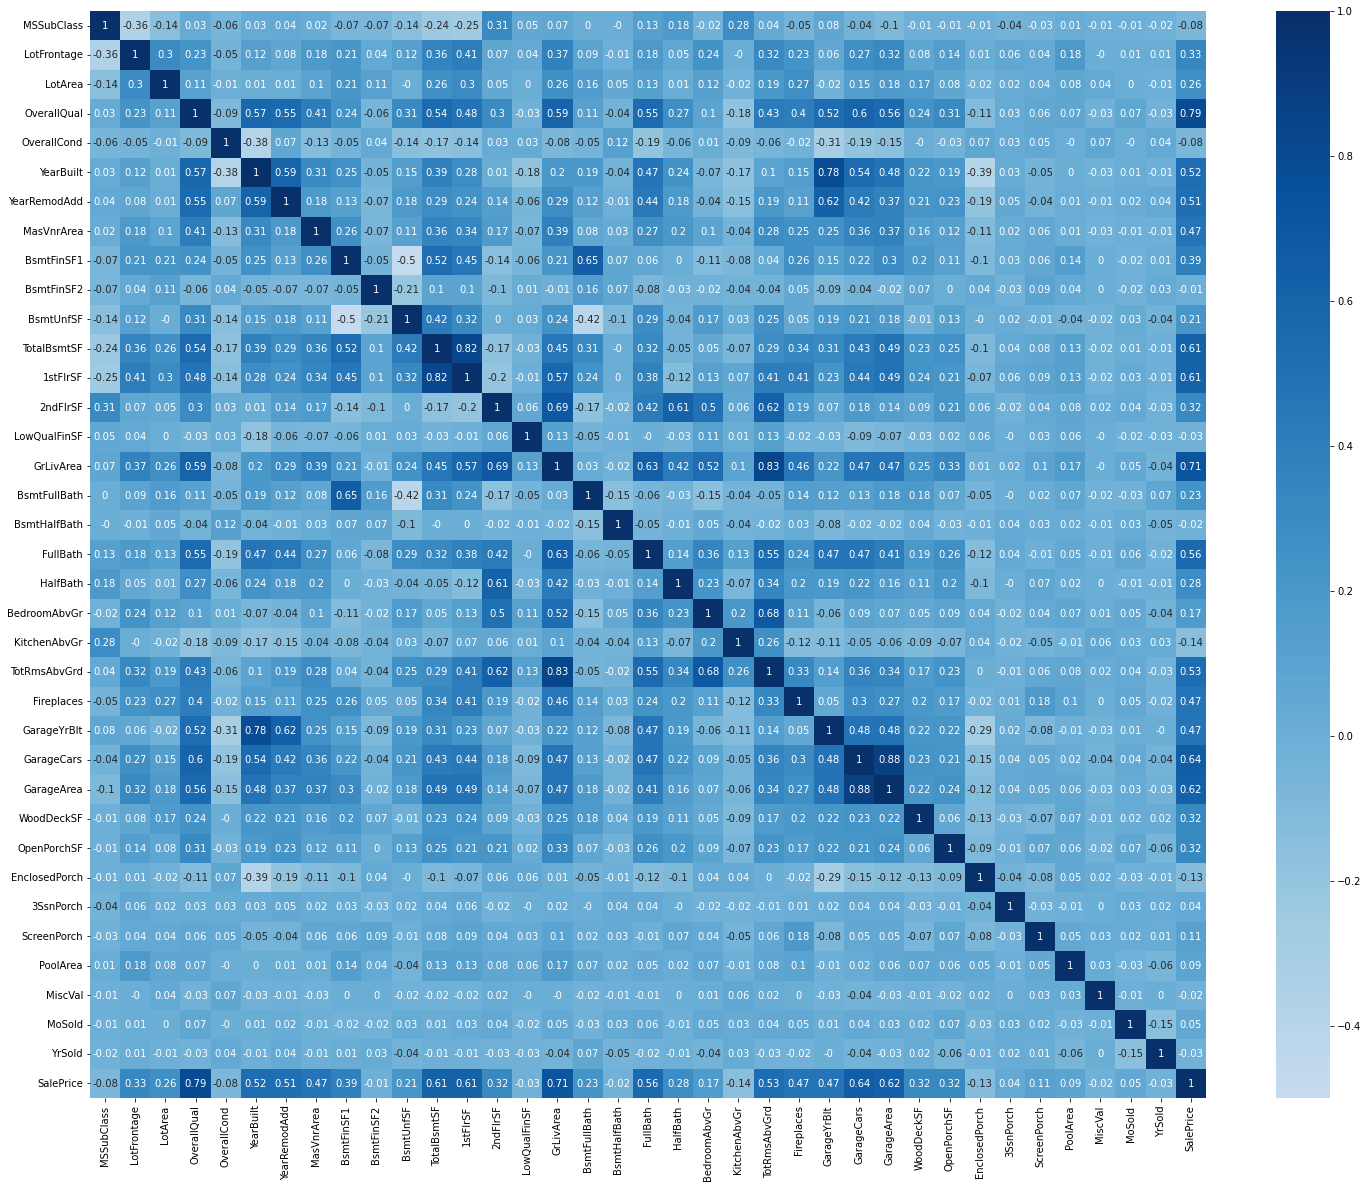

In [ ]:
# Checking the corelation
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(df_num.corr(),2), cmap='Blues' , annot=True, center = 0)
plt.show()

In [ ]:
# splitting the data into train and test
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [ ]:
# Select upper triangle of correlation matrix
# Find features with correlation greater than 0.7
# Dropping the features if corelation is greater than 0.7
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
X.drop(to_drop, axis=1, inplace=True)

C:\Users\2053781\AppData\Local\Temp/ipykernel_5716/280809485.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


Linear Regression

In [ ]:
# linear regression 
lm = LinearRegression()
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9500545031169673
0.8805927522374019


In [ ]:
# Simple Linear Regression model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-40093.161, 'BsmtFinType1_Rec'),
 (39831.914, 'LotShape_IR2'),
 (36200.703, 'LotShape_Reg'),
 (35662.691, 'Condition2_Feedr'),
 (35410.715, 'LandContour_HLS'),
 (-32312.133, 'Foundation_Stone'),
 (30079.837, 'HeatingQC_Fa'),
 (-28067.084, 'Neighborhood_NAmes'),
 (-27301.156, 'Neighborhood_Veenker'),
 (-27243.255, 'Neighborhood_Timber'),
 (-26066.972, 'BsmtCond_Po'),
 (25787.693, 'RoofStyle_Gambrel'),
 (-23901.212, 'Neighborhood_NoRidge'),
 (-23646.172, 'Neighborhood_Sawyer'),
 (22958.941, 'RoofMatl_Roll'),
 (22929.581, 'Condition1_PosN'),
 (-22786.133, 'GarageQual_Fa'),
 (21536.701, 'LotConfig_FR2'),
 (-21292.614, 'BsmtFinType2_GLQ'),
 (20779.707, 'RoofStyle_Gable'),
 (-20490.576, 'Neighborhood_OldTown'),
 (-20461.687, 'Neighborhood_NWAmes'),
 (-20300.926, 'GarageQual_Gd'),
 (-20215.742, 'SaleType_New'),
 (19884.628, 'LotShape_IR3'),
 (19766.957, 'Exterior2nd_Wd Shng'),
 (-19684.991, 'Condition1_RRAn'),
 (-19298.502, 'SaleCondition_AdjLand'),
 (-19158.494, 'Condition1_Feedr'),
 (-190

Ridge Regression

In [ ]:
# list of alphas to tune
params = {'alpha': [0.00004,0.0001, 0.001, 0.01, 0.1, 10,100,1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [4e-05, 0.0001, 0.001, 0.01, 0.1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010732,0.008082,0.002990,0.000631,0.00004,{'alpha': 4e-05},0.918549,0.875840,0.900760,0.878870,...,0.890674,0.016530,6,0.950135,0.956373,0.951929,0.955435,0.956397,0.954054,0.002555
1,0.005654,0.000757,0.002914,0.000135,0.0001,{'alpha': 0.0001},0.918555,0.875845,0.900773,0.878872,...,0.890680,0.016532,5,0.950135,0.956373,0.951929,0.955435,0.956397,0.954054,0.002555
2,0.005752,0.000974,0.002986,0.000631,0.001,{'alpha': 0.001},0.918639,0.875927,0.900956,0.878890,...,0.890764,0.016559,4,0.950135,0.956373,0.951929,0.955435,0.956397,0.954054,0.002555
3,0.005601,0.000799,0.003049,0.000647,0.01,{'alpha': 0.01},0.919321,0.876701,0.902642,0.879068,...,0.891532,0.016766,3,0.950127,0.956369,0.951917,0.955430,0.956393,0.954047,0.002558
4,0.005860,0.000752,0.003145,0.000500,0.1,{'alpha': 0.1},0.921667,0.881755,0.912077,0.880691,...,0.895983,0.017351,2,0.949814,0.956140,0.951446,0.955184,0.956187,0.953754,0.002627


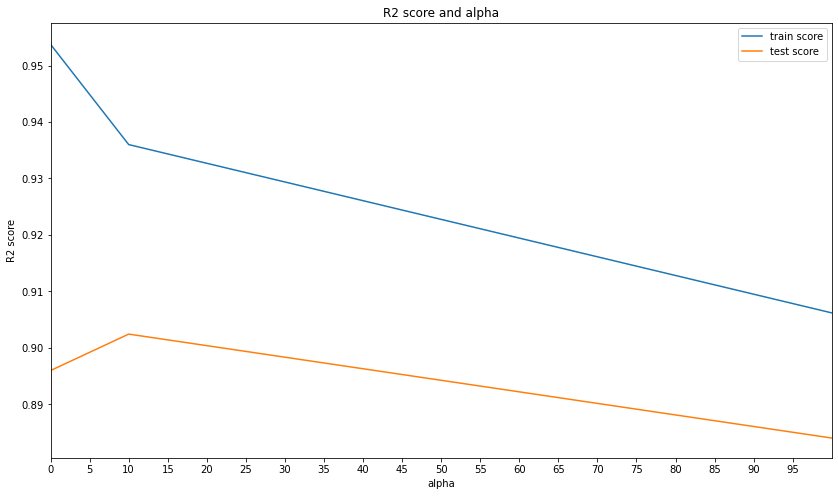

In [ ]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(14,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.title("R2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.show()



In [ ]:
#optimum alpha
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_
ridge.score(X_train,y_train)
ridge.score(X_test,y_test)

0.9274823919969231

In [ ]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))


[('constant', -42311.298),
 ('MSSubClass', -11326.981),
 ('LotFrontage', -10653.25),
 ('LotArea', -10249.245),
 ('OverallQual', -9840.449),
 ('OverallCond', -8436.779),
 ('MasVnrArea', -7768.14),
 ('BsmtFinSF1', -7600.505),
 ('BsmtFinSF2', -6991.275),
 ('BsmtUnfSF', -6853.45),
 ('TotalBsmtSF', -6543.466),
 ('2ndFlrSF', -6530.234),
 ('LowQualFinSF', -6431.686),
 ('GrLivArea', -6111.469),
 ('BsmtFullBath', -5964.793),
 ('BsmtHalfBath', -5707.501),
 ('FullBath', -5690.786),
 ('BedroomAbvGr', -5602.974),
 ('KitchenAbvGr', -5543.095),
 ('Fireplaces', -5279.425),
 ('GarageCars', -5180.973),
 ('WoodDeckSF', -4777.374),
 ('OpenPorchSF', -4526.075),
 ('EnclosedPorch', -4317.389),
 ('3SsnPorch', -4118.968),
 ('ScreenPorch', -3959.709),
 ('PoolArea', -3893.402),
 ('MiscVal', -3893.061),
 ('MoSold', -3857.469),
 ('MSZoning_FV', -3718.937),
 ('MSZoning_RH', -3708.261),
 ('MSZoning_RL', -3597.724),
 ('Street_Pave', -3557.322),
 ('LotShape_IR2', -3445.396),
 ('LotShape_IR3', -3407.819),
 ('LotShape_R

Lasso Regression

In [ ]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\2053781\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54834364354.88325, tolerance: 219927920.4440998
  model = cd_fast.enet_coordinate_descent(
C:\Users\2053781\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49856011407.52184, tolerance: 228555815.06410015
  model = cd_fast.enet_coordinate_descent(
C:\Users\2053781\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56831142343.98338, tolerance: 236444123.0114977
  model = cd_fast.enet_coordinate_descent(
C:\Users\2053781\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [4e-05, 0.0001, 0.001, 0.01, 0.1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.077774,0.011798,0.002824,0.000584,0.00004,{'alpha': 4e-05},0.920489,0.877474,0.900880,0.876852,...,0.890555,0.017567,7,0.950134,0.956373,0.951929,0.955435,0.956397,0.954053,0.002556
1,0.070208,0.007911,0.003208,0.000989,0.0001,{'alpha': 0.0001},0.920488,0.877474,0.900880,0.876856,...,0.890558,0.017565,6,0.950134,0.956373,0.951929,0.955435,0.956397,0.954053,0.002556
2,0.071248,0.003478,0.002870,0.000649,0.001,{'alpha': 0.001},0.920488,0.877468,0.900884,0.876911,...,0.890599,0.017534,5,0.950134,0.956373,0.951929,0.955435,0.956397,0.954053,0.002556
3,0.099400,0.010679,0.004421,0.001322,0.01,{'alpha': 0.01},0.920489,0.877420,0.900919,0.877444,...,0.890973,0.017264,4,0.950134,0.956373,0.951929,0.955435,0.956397,0.954053,0.002556
4,0.077761,0.003015,0.003937,0.001040,0.1,{'alpha': 0.1},0.920415,0.877211,0.901278,0.878539,...,0.891530,0.016920,3,0.950133,0.956372,0.951928,0.955435,0.956397,0.954053,0.002556


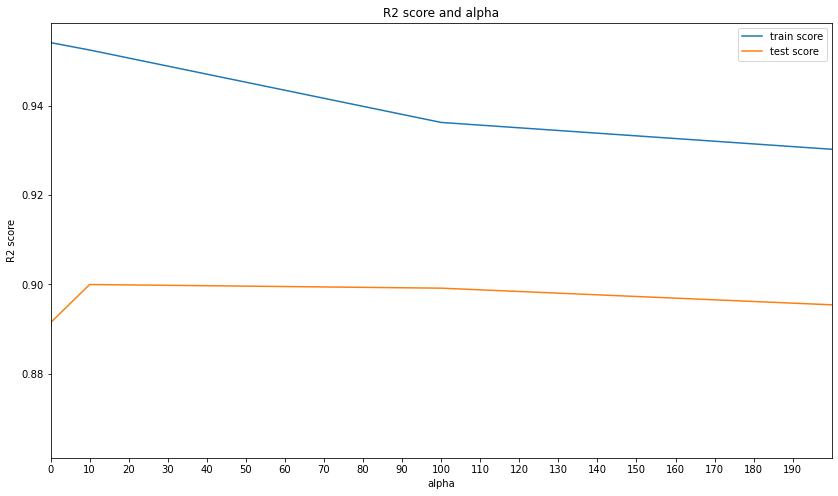

In [ ]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(14,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.title("R2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))

plt.show()


In [ ]:
alpha =25
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9450676106864344
0.9201782650029007


In [ ]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 2) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-33059.42, 'constant'),
 (31608.39, 'Condition1_PosN'),
 (23346.25, 'Neighborhood_StoneBr'),
 (23196.48, 'Neighborhood_SawyerW'),
 (22815.51, 'Condition2_Feedr'),
 (20902.04, 'HeatingQC_Fa'),
 (20795.05, 'Neighborhood_Mitchel'),
 (20707.62, 'LandContour_Low'),
 (-18971.69, 'SaleType_New'),
 (-18648.99, 'SaleCondition_AdjLand'),
 (-17997.53, 'Foundation_Stone'),
 (-17623.09, 'SaleType_Oth'),
 (-16315.05, 'BsmtFinType2_GLQ'),
 (-15380.63, 'Electrical_FuseF'),
 (-15156.24, 'BsmtFinType1_Rec'),
 (14362.76, 'KitchenQual_Fa'),
 (-13547.0, 'MasVnrType_BrkFace'),
 (-12762.68, 'BsmtFinType2_BLQ'),
 (12681.36, 'LotConfig_FR2'),
 (-12579.81, 'Neighborhood_Veenker'),
 (-12127.68, 'HeatingQC_TA'),
 (11880.67, 'RoofMatl_Roll'),
 (11334.49, 'Condition1_PosA'),
 (-11018.48, 'Neighborhood_Blueste'),
 (-10932.65, 'MasVnrType_Stone'),
 (-10637.53, 'Condition2_PosN'),
 (-10598.28, 'CentralAir_Y'),
 (-10499.96, 'Neighborhood_Timber'),
 (-10139.7, 'BsmtExposure_No'),
 (9996.09, 'Heating_Wall'),
 (9747.68,

# finally the features that are useful for prediction by the model are as follows
lasso_selected_features
['OverallQual_9',
 'OverallQual_10',
 'SaleCondition_Alloca',
 'Neighborhood_StoneBr',
 'Neighborhood_Crawfor',
 'Neighborhood_MeadowV',
 'KitchenQual_TA',
 'KitchenQual_Gd',
 'SaleCondition_Partial',
 'Exterior1st_BrkFace',
 'OverallQual_8',
 'Condition1_RRAe',
 'KitchenQual_Fa',
 'MSSubClass_160',
 'BsmtExposure_Gd',
 'Neighborhood_NoRidge',
 'MasVnrType_Stone',
 'Exterior1st_CemntBd',
 'OverallCond_3',
 'BsmtFinType1_GLQ',
 'Neighborhood_Edwards',
 'BsmtQual_TA',
 'GarageCond_Fa']